# Short Story on Yelp Dataset

In [1]:
import pandas as pd

#### Install special packages with
* conda install -c anaconda pandas-profiling
* conda install -c conda-forge wordcloud

# Dataset:

dataset can be downloaded here: https://www.yelp.com/dataset/download

In [2]:
business = pd.read_json("business.json", lines=True)

# Data Profiling

In [7]:
%%capture --no-display
import pandas_profiling
pandas_profiling.ProfileReport(business)

#### pick one city - Las Vegas

In [8]:
data = business[business['city']=='Las Vegas']

In [9]:
data.head(20)

address  \
7   4545 E Tropicana Rd Ste 8, Tropicana   
17          1775 E Tropicana Ave, Ste 29   
18                                         
20               450 Fremont St, Ste 179   
22                   6007 Dean Martin Dr   
24         7981 W Tropical Pkwy, Ste 120   
25                 6055 E Lake Mead Blvd   
28         3325 W Desert Inn Rd, Ste 101   
30                8800 W Charleston Blvd   
34                   3150 N Rainbow Blvd   
41               6775 Edmond St, Ste 210   
42                       3011 Arville St   
43                       4190 N Pecos Rd   
64                 4910 S Fort Apache Rd   
67                 3339 Las Vegas Blvd S   
69                 6798 Cherry Grove Ave   
70                8751 W Charleston Blvd   
75               6125 Spring Mountain Rd   
86                      4380 N Lamb Blvd   
93                   3500 Las Vegas Blvd   

                                           attributes             business_id  \
7   {'RestaurantsPriceRange2': '3', 'GoodForKids':...  gbQN7vr_caG_A1ugSmGhWg   
17  {'OutdoorSeating': 'False', 'BusinessAcceptsCr...  PZ-LZzSlhSe9utkQYU8pFg   
18             {'BusinessAcceptsCreditCards': 'True'}  nh_kQ16QAoXWwqZ05MPfBQ   
20                            {'GoodForKids': 'True'}  dFMxzHygTy6F873843dHAA   
22  {'BikeParking': 'False', 'Ambience': '{'romant...  KWywu2tTEPWmR9JnBc0WyQ   
24  {'BusinessAcceptsCreditCards': 'True', 'Busine...  BsMdebN4nZySpGTfXr-7yg   
25  {'BikeParking': 'True', 'BusinessParking': '{'...  tstimHoMcYbkSC4eBA1wEg   
28             {'BusinessAcceptsCreditCards': 'True'}  iojTeSaoPuxm4WeCzDUA6w   
30  {'BusinessAcceptsCreditCards': 'True', 'Restau...  LB6ZyCfUzeX9OLdunHhnOQ   
34  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...  HVPcIcqiJkrpD36xZFGN6g   
41  {'BusinessAcceptsCreditCards': 'False', 'ByApp...  FDI2PkyJBWEVFZ0ndHFg2g   
42                                               None  Qwt9lOpplBAZ7JBrgAqI7g   
43  {'RestaurantsPriceRange2': '1', 'BusinessAccep...  NBn4hgfGtNz91k3VsDZlmw   
64                                               None  a_TfmuLIHsRDyg7aVJQCBQ   
67                                               None  R3rss9fkfJxiOK6DueON3w   
69  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...  kJbteCeQTiEB8Xdn9dA7rw   
70  {'ByAppointmentOnly': 'True', 'HairSpecializes...  5sFVttifV5ID8Gs0-iiAsA   
75  {'RestaurantsPriceRange2': '1', 'Ambience': '{...  kANF0dbeoW34s2vwh6Umfw   
86             {'BusinessAcceptsCreditCards': 'True'}  1gkJBdrkfdO7rEMml9e2KQ   
93  {'ByAppointmentOnly': 'False', 'RestaurantsPri...  gas3YSrKkEcBliUHhnOLTg   

                                           categories       city  \
7   Hair Salons, Hair Stylists, Barbers, Men's Hai...  Las Vegas   
17                               Restaurants, Italian  Las Vegas   
18  Event Planning & Services, Photographers, Prof...  Las Vegas   
20                      Arcades, Arts & Entertainment  Las Vegas   
22  Nightlife, Arts & Entertainment, Bars, Strip C...  Las Vegas   
24  Women's Clothing, Shopping, Accessories, Fashi...  Las Vegas   
25  Mexican, Restaurants, Patisserie/Cake Shop, Fo...  Las Vegas   
28  Car Rental, Windshield Installation & Repair, ...  Las Vegas   
30  Shopping, Home & Garden, Department Stores, Me...  Las Vegas   
34  Home Services, Real Estate, Financial Services...  Las Vegas   
41  Real Estate, Home Services, Mortgage Brokers, ...  Las Vegas   
42             Home Services, Real Estate, Apartments  Las Vegas   
43  Local Services, Food Banks, Community Service/...  Las Vegas   
64          Financial Services, Banks & Credit Unions  Las Vegas   
67                Shopping, Women's Clothing, Fashion  Las Vegas   
69  Tree Services, Landscape Architects, Home Serv...  Las Vegas   
70  Hair Loss Centers, Beauty & Spas, Hair Stylist...  Las Vegas   
75  Fast Food, Food, Restaurants, Ice Cream & Froz...  Las Vegas   
86                     Automotive, Auto Repair, Tires  Las Vegas   
93  Accessories, Shopping, Fashion, Jewelry, L

#### focus on restaurants

In [10]:
is_category_not_none = data.apply(lambda x: x['categories'] is not None, axis=1)

In [11]:
is_restaurants = data[is_category_not_none].apply(lambda x: "Restaurants" in x['categories'].split(","), axis=1)

In [12]:
restaurants = data[is_category_not_none][is_restaurants]

# Questions:

## 1. Open Hours

### What is the popular open hours of restaurant in Las Vegas ?

In [13]:
%%capture --no-display
hours = restaurants[data.apply(lambda x: x['hours'] is not None, axis=1)]["hours"].to_frame()

In [14]:
# hours.values.item(0).get("Monday")
def parse_open_hour(x):
    open_hour = x.values[0]
    return pd.Series([open_hour.get("Monday"), 
                      open_hour.get("Tuesday"), 
                      open_hour.get("Wednesday"), 
                      open_hour.get("Thursday"), 
                      open_hour.get("Friday"),
                      open_hour.get("Saturday"), 
                      open_hour.get("Sunday")])

In [15]:
hours[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]] = hours.apply(lambda x: parse_open_hour(x), axis=1)

In [16]:
hours.head()

hours      Monday  \
135  {'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...    16:0-0:0   
240  {'Monday': '0:0-0:0', 'Tuesday': '8:0-15:0', '...     0:0-0:0   
494  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   11:0-22:0   
543  {'Monday': '10:30-20:0', 'Tuesday': '10:30-20:...  10:30-20:0   
941  {'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'...   10:0-23:0   

        Tuesday   Wednesday    Thursday      Friday    Saturday      Sunday  
135    16:0-0:0    16:0-0:0    16:0-0:0    16:0-0:0    16:0-0:0    6:0-14:0  
240    8:0-15:0    8:0-15:0    8:0-15:0   10:0-16:0    8:0-15:0    8:0-15:0  
494   11:0-22:0   11:0-22:0   11:0-22:0   11:0-22:0   11:0-22:0   11:0-22:0  
543  10:30-20:0  10:30-20:0  10:30-20:0  10:30-20:0  10:30-20:0  10:30-19:0  
941   10:0-23:0   10:0-23:0   10:0-23:0    10:0-0:0    10:0-0:0   10:0-23:0

#### heatmap to visualize open hours

In [17]:
# pivot data into heatmap form
hours_heat_map = pd.DataFrame(0, columns=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], index=range(0,24))

In [18]:
for i,j in hours.iterrows():
    for column in j.index:
        if column == 'hours': continue
        else:
            open_hour_start_end = hours.loc[i,column]
            if open_hour_start_end is None: continue
            open_hour_start, open_hour_end = open_hour_start_end.split("-")
            open_hour_start = int(open_hour_start.split(":")[0])
            open_hour_end = int(open_hour_end.split(":")[0])
            while open_hour_start%24 != open_hour_end:
                hours_heat_map.loc[open_hour_start%24,column] += 1
                open_hour_start +=1

In [21]:
%%capture --no-display
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
ax = sns.heatmap(hours_heat_map.transpose())

#### Conclusion:

* most business open between 1000 and 2200
* between 2100 and 2200 on Friday, Saturday there is more restaurants open than weekdays

## 2. Restaurant Information

#### category of restaurants

In [26]:
categories_list = []
for categories in restaurants["categories"].apply(lambda x: x.split(",")).values:
    for category in categories:
        categories_list.append(category)

In [27]:
from collections import Counter
frequencies = dict(Counter(categories_list))
# remove domain STOPWORDS
del frequencies["Restaurants"]

In [28]:
import wordcloud 
wordcloud = wordcloud.WordCloud().generate_from_frequencies(frequencies)

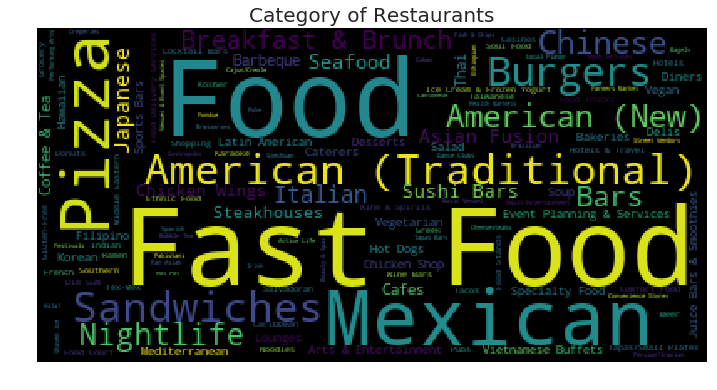

In [29]:
%%capture --no-display
plt.figure(figsize = (12,18))
plt.imshow(wordcloud)
plt.title("Category of Restaurants", fontsize = 20)
plt.axis('off')
plt.show()

In [30]:
from collections import defaultdict
attributes_dict = defaultdict(list)
for index, value in restaurants["attributes"].items():
    # skip none value
    if value is None: continue
    for k,v in value.items():
        attributes_dict[k].append(v)

#### Items of attributes

In [31]:
attributes_dict.keys()

dict_keys(['OutdoorSeating', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'RestaurantsReservations', 'RestaurantsAttire', 'Ambience', 'HasTV', 'BYOBCorkage', 'NoiseLevel', 'RestaurantsTakeOut', 'RestaurantsPriceRange2', 'RestaurantsGoodForGroups', 'WiFi', 'Caters', 'GoodForKids', 'Alcohol', 'BusinessParking', 'Corkage', 'BikeParking', 'WheelchairAccessible', 'DogsAllowed', 'RestaurantsTableService', 'GoodForMeal', 'BusinessAcceptsBitcoin', 'ByAppointmentOnly', 'BYOB', 'DriveThru', 'BestNights', 'CoatCheck', 'Music', 'HappyHour', 'GoodForDancing', 'Smoking', 'AgesAllowed', 'Open24Hours', 'DietaryRestrictions', 'RestaurantsCounterService'])

In [32]:
def draw_pie_chart(categories_dict):
    fig1, ax1 = plt.subplots()
    ax1.pie(categories_dict.values(), labels=categories_dict.keys(), autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.show()

#### OutdoorSeating

In [33]:
%%capture --no-display
OutdoorSeating = Counter(attributes_dict["OutdoorSeating"])
fig1, ax1 = plt.subplots()
ax1.pie(OutdoorSeating.values(), labels=OutdoorSeating.keys(), autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

#### BusinessAcceptsCreditCards

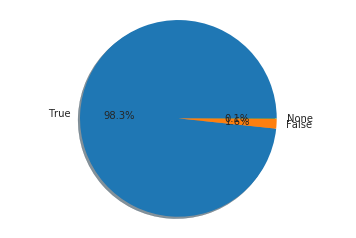

In [34]:
%%capture --no-display
BusinessAcceptsCreditCards = Counter(attributes_dict["BusinessAcceptsCreditCards"])
fig1, ax1 = plt.subplots()
ax1.pie(BusinessAcceptsCreditCards.values(), labels=BusinessAcceptsCreditCards.keys(), autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

#### RestaurantsDelivery

In [35]:
%%capture --no-display
draw_pie_chart(Counter(attributes_dict["RestaurantsDelivery"]))

In [36]:
%%capture --no-display
draw_pie_chart(Counter(attributes_dict["BusinessAcceptsBitcoin"]))

In [37]:
%%capture --no-display
draw_pie_chart(Counter(attributes_dict["ByAppointmentOnly"]))

#### Conclusion:

* credit card is very well accepted in Las Vegas
* bitcoin is not well accepted yet(even in Las Vegas), most of the restaurant accepts of course credit card